In [1]:
#from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')

In [3]:
bike_rack = pd.read_csv('../data/BikeRacks_20240413.csv')

In [4]:
bike_rack

,the_geom,Type,OBJECTID,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle
0,POINT (-86.65545277788499 36.049927777764),Rack,1,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept
1,POINT (-86.63406252260494 36.185280037810095),Rack,2,Public,Existing,114,2,Greenway,4,-86.634063,36.185280,Stones River Greenway - Donelson/Hermitage Area,Health Dept
2,POINT (-86.62067056966654 36.1584215986261),Rack,3,Public,Proposed,256,0,Park/Greenway,0,-86.620671,36.158422,"Percy Priest Reservoir, Stones River Greenway",Health Dept
3,POINT (-86.68652592673462 36.18754669484766),Rack,4,Public,Existing,115,1,Park/Greenway,5,-86.686526,36.187547,"Two Rivers Golf Course, Stones River Greenway ...",Health Dept
4,POINT (-86.76218008308796 36.17245540617397),Rack,5,Public,Existing,103,3,Park/Community Center,15,-86.762180,36.172455,East Park & Community Center,Health Dept
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,POINT (-86.79135100063249 36.15239299972696),Bike Rack,426,Public,Existing,439,1,Resturant/ Music Row,8,-86.791351,36.152393,NE Corner of Demonbruen St and Music Row,Civic
426,POINT (-86.79099197520954 36.180616460127915),Bike Rack,427,Public,Existing,440,1,Park,4,-86.790992,36.180616,Morgan Park,Civic
427,POINT (-86.7891631202589 36.12661189693866),Bike Rack,428,Public,Existing,441,1,Resturant/ 12th South,10,-86.789163,36.126612,2318 12th Ave S,Civic
428,POINT (-86.76936299977169 36.164313999524836),Artistic,429,Public,Existing,65,1,Greenway,8,-86.769363,36.164314,East end of Shelby St Pedestrian Bridge,Health Dept


In [5]:
bike_geo = gpd.GeoDataFrame(bike_rack, 
                           crs = zipcodes.crs, 
                           geometry = gpd.points_from_xy(bike_rack['LON'], bike_rack['LAT']))

In [6]:
type(bike_geo)

geopandas.geodataframe.GeoDataFrame

In [7]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [8]:
racks_by_zip = gpd.sjoin(bike_geo, zipcodes, predicate = 'within')

In [9]:
racks_by_zip = racks_by_zip[['Quantity','Location','Capacity','LON','LAT','Detail_Loc','Data_Colle','geometry','index_right','zip','po_name']]

In [32]:
racks_by_zip

,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle,geometry,index_right,zip,po_name
0,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept,POINT (-86.65545 36.04993),51,37013,ANTIOCH
1,2,Greenway,4,-86.634063,36.185280,Stones River Greenway - Donelson/Hermitage Area,Health Dept,POINT (-86.63406 36.18528),37,37214,NASHVILLE
2,0,Park/Greenway,0,-86.620671,36.158422,"Percy Priest Reservoir, Stones River Greenway",Health Dept,POINT (-86.62067 36.15842),37,37214,NASHVILLE
3,1,Park/Greenway,5,-86.686526,36.187547,"Two Rivers Golf Course, Stones River Greenway ...",Health Dept,POINT (-86.68653 36.18755),37,37214,NASHVILLE
4,3,Park/Community Center,15,-86.762180,36.172455,East Park & Community Center,Health Dept,POINT (-86.76218 36.17246),13,37206,NASHVILLE
...,...,...,...,...,...,...,...,...,...,...,...
425,1,Resturant/ Music Row,8,-86.791351,36.152393,NE Corner of Demonbruen St and Music Row,Civic,POINT (-86.79135 36.15239),35,37203,NASHVILLE
426,1,Park,4,-86.790992,36.180616,Morgan Park,Civic,POINT (-86.79099 36.18062),40,37208,NASHVILLE
427,1,Resturant/ 12th South,10,-86.789163,36.126612,2318 12th Ave S,Civic,POINT (-86.78916 36.12661),2,37204,NASHVILLE
428,1,Greenway,8,-86.769363,36.164314,East end of Shelby St Pedestrian Bridge,Health Dept,POINT (-86.76936 36.16431),31,37213,NASHVILLE


In [10]:
racks_in_37207 = racks_by_zip.loc[racks_by_zip['zip'] == '37207']

In [28]:
racks_in_37207.info

<bound method DataFrame.info of      Quantity               Location  Capacity        LON        LAT  \
36          0           Fire Station         0 -86.746228  36.207467   
37          1      Elementary School         9 -86.756364  36.208675   
38          1      Elementary School         9 -86.756342  36.208544   
39          0          Middle School         0 -86.751650  36.218844   
40          0          Middle School         0 -86.788314  36.207883   
83          1  Park/Community Center         5 -86.767516  36.181972   
84          0  Park/Community Center         0 -86.760847  36.187903   
85          1          Middle School        16 -86.765753  36.186086   
86          2          Middle School        28 -86.769169  36.194300   
87          0                 School         0 -86.760905  36.203539   
88          0          Middle School         0 -86.781778  36.220372   
89          0  Park/Community Center         0 -86.771013  36.235044   
90          0           Fire Sta

In [11]:
polygon37207 = zipcodes.loc[zipcodes['zip'] == '37207']

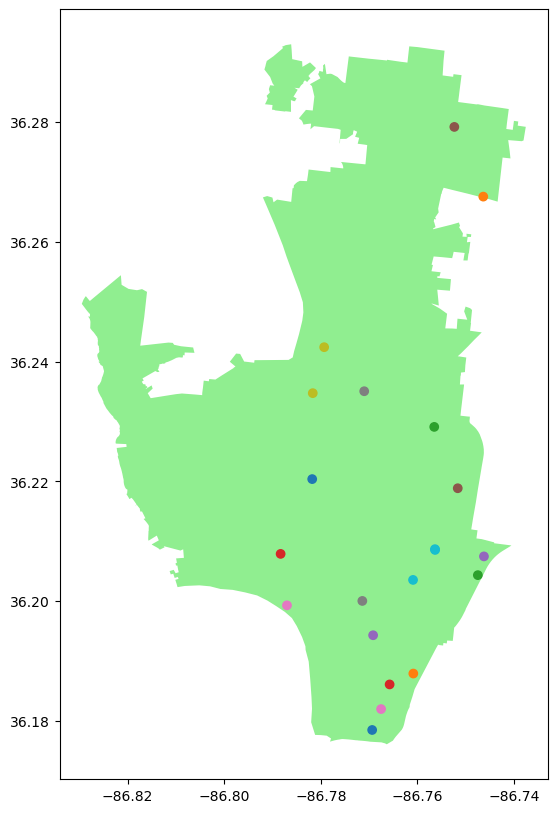

In [13]:
#fig, ax = matplotlib.subplots()
ax = polygon37207.plot(figsize = (8, 10), color = 'lightgreen')
racks_in_37207.plot( ax = ax, column = 'Detail_Loc');
plt.show();

In [14]:
polygon37207.geometry.centroid

C:\Users\marya\AppData\Local\Temp\ipykernel_18920\3792774199.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37207.geometry.centroid


19    POINT (-86.78726 36.28724)
42    POINT (-86.77677 36.23245)
dtype: geometry

In [16]:
center = polygon37207.geometry.centroid[42]
print(center)

POINT (-86.77676762469858 36.23245257407244)


C:\Users\marya\AppData\Local\Temp\ipykernel_18920\3947872332.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37207.geometry.centroid[42]


In [17]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.23245257407244, -86.77676762469858]


In [19]:
#create our map of Nashville Zip Code 37207 and show it
map_37207 = folium.Map(location =  area_center, zoom_start = 12)
map_37207

In [21]:
i = 0
for row_index, row_values in racks_in_37207.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 36
values are:
 
Quantity                                          0
Location                               Fire Station
Capacity                                          0
LON                                      -86.746228
LAT                                       36.207467
Detail_Loc                       Heavy Vehicle Shop
Data_Colle                              Health Dept
geometry       POINT (-86.7462277777 36.2074666667)
index_right                                      42
zip                                           37207
po_name                                   NASHVILLE
Name: 36, dtype: object
------------------------- 
index is 37
values are:
 
Quantity                                          1
Location                          Elementary School
Capacity                                          9
LON                                      -86.756364
LAT                                       36.208675
Detail_Loc                Tom Joy Elementary School
Data_Colle   

In [24]:
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37207).add_to(map_37207)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in racks_in_37207.iterrows():
    loc = [row_values['LAT'], row_values['LON']]
    pop = str(row_values['Detail_Loc'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37207)
map_37207.save('../maps/map37207.html')

#display our map
map_37207

In [26]:
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37207).add_to(map_37207)

#create a list of locations and pass them to FastMarkerCluster()
locations = racks_in_37207[['LAT', 'LON']].values.tolist()
map_37207.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_37207